In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load the Sign Language MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [4]:
# Convert labels to categorical (one-hot encoding)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [5]:
#Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8204 - loss: 0.5517 - val_accuracy: 0.9724 - val_loss: 0.0864
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9730 - loss: 0.0932 - val_accuracy: 0.9802 - val_loss: 0.0708
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9802 - loss: 0.0682 - val_accuracy: 0.9867 - val_loss: 0.0448
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9862 - loss: 0.0471 - val_accuracy: 0.9857 - val_loss: 0.0500
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9892 - loss: 0.0372 - val_accuracy: 0.9840 - val_loss: 0.0580
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9900 - loss: 0.0323 - val_accuracy: 0.9860 - val_loss: 0.0503
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9921 - loss: 0.0269 - val_accuracy: 0.9873 - val_loss: 0.0542
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9928 -

In [7]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9815 - loss: 0.0884
Test accuracy: 98.60%


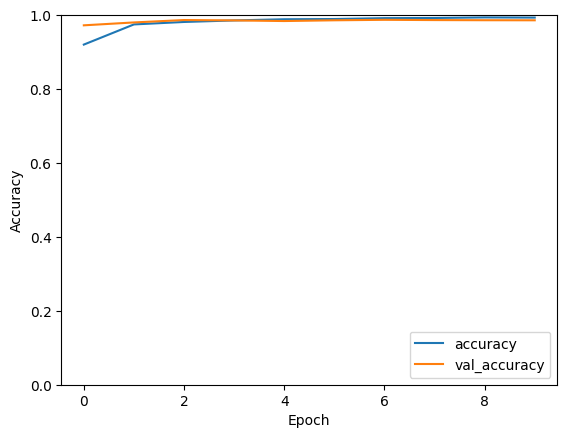

In [8]:
#visualize the training model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [9]:
#saving the model
model.save('sign_language_recognition_model.h5')

In [11]:
#prediction on new data
def predict_gesture(image):
    image = image.reshape(1, 28, 28, 1).astype('float32') / 255.0
    prediction = model.predict(image)
    return tf.argmax(prediction, axis=1).numpy()[0]

In [12]:
# testing the model on a new image (assuming a 28x28 grayscale image)
new_image = test_images[0]  # Example test image
predicted_label = predict_gesture(new_image)
print(f'Predicted Label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted Label: 1


In [15]:
#confusion matrix
# Predict labels for test set
import seaborn as sns
import numpy as np
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [21]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix = confusion_matrix(y_true, y_pred_classes)

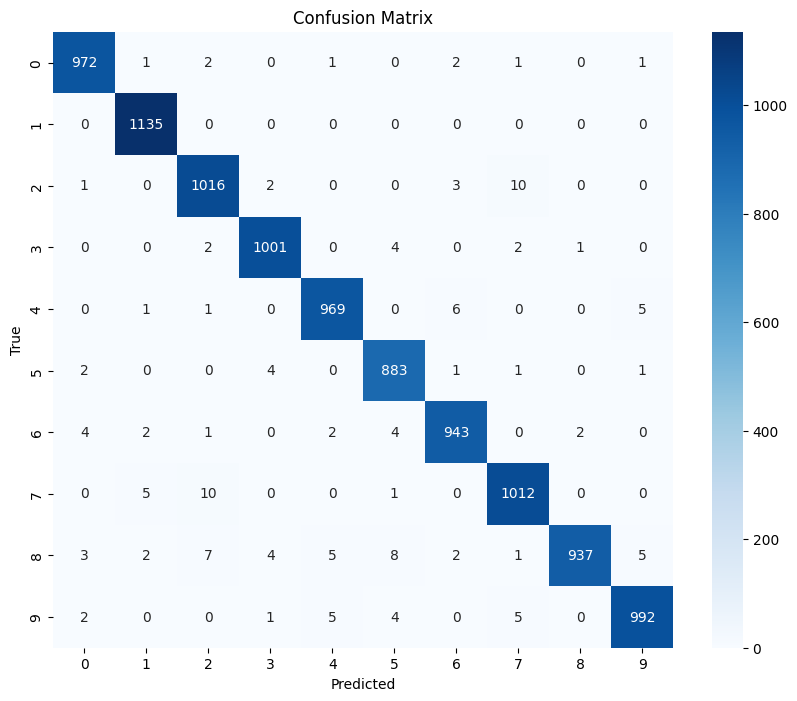

In [19]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Print classification report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(0.5, 1.0, 'Model Accuracy')

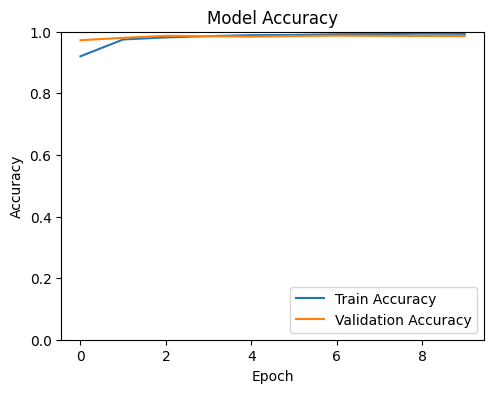

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')

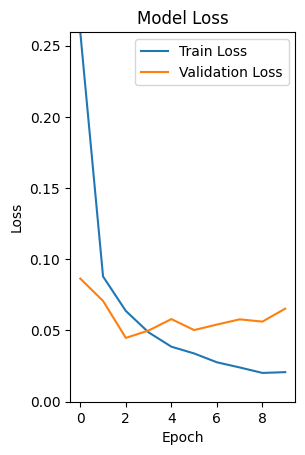

In [24]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(history.history['loss'])])
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()

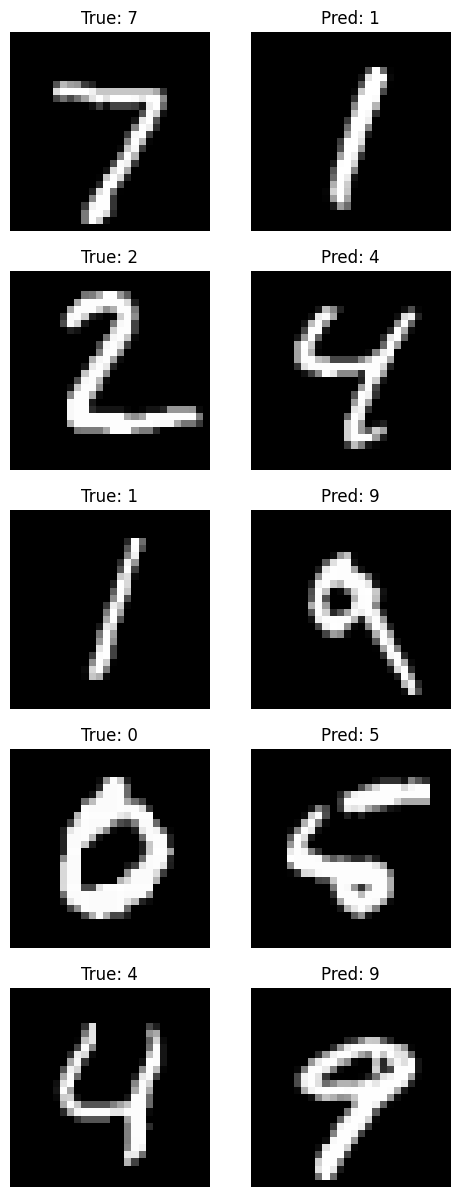

In [25]:
#visualizations of predictions
def plot_sample_predictions(images, true_labels, pred_labels, class_names, num_samples=5):
    plt.figure(figsize=(15, num_samples * 3))
    for i in range(num_samples):
        plt.subplot(num_samples, 5, i * 5 + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[true_labels[i]]}")
        plt.axis('off')

        plt.subplot(num_samples, 5, i * 5 + 2)
        plt.imshow(images[i + 5].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {class_names[pred_labels[i + 5]]}")
        plt.axis('off')
    plt.show()
# Class names for the MNIST dataset (0-9 digits)
class_names = [str(i) for i in range(10)]
# Visualize some predictions
plot_sample_predictions(test_images, y_true, y_pred_classes, class_names, num_samples=5)

In [ ]:
#ALTERNATIVE CODE
#ALTERNATIVE CODE

In [26]:
#classifies gestures by reading muscle activity
import numpy as np # linear algebra
import pandas as pd # data processing

In [34]:
df0 = pd.read_csv("/content/0.csv", header=None )
df1 = pd.read_csv("/content/1.csv", header=None )
df2 = pd.read_csv("/content/2.csv", header=None )
df3 = pd.read_csv("/content/3.csv", header=None )
df = pd.concat([df0,df1,df2,df3], axis = 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [28]:
x = df.loc[:,0:63]
y = df[64]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
lr_grid = {'max_depth' : [2,4,8,16,32,64,128],
           'criterion' : ['entropy','gini']}
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
gs = GridSearchCV(estimator = clf, param_grid=lr_grid,cv = 10)
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 16, 32, 64, 128]})

In [31]:
y_pred = gs.predict(x_test)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 32}

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('Classification Report: \n', classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       582
           1       0.95      0.92      0.93       581
           2       0.93      0.93      0.93       589
           3       0.89      0.88      0.88       584

    accuracy                           0.92      2336
   macro avg       0.92      0.92      0.92      2336
weighted avg       0.92      0.92      0.92      2336



In [33]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[567   0   6   9]
 [  0 534  19  28]
 [  8  10 545  26]
 [ 33  21  18 512]]
